## 회귀 (Regression) – 숫자 예측
####   - 예: 주가 예측, 온도 예측

### 농어 샘플 56개의 높이, 길이 등 수치로 무게를 예측하기

#### 지도 학습 알고리즘은 크게 분류와 회귀(regression)로 나뉨
##### - 분류: 샘플을 몇 개의 클래스 중 하나로 분류
##### - 회귀: 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측
##### - 예) 내년도 경제 성장률을 예측하거나 배달이 도착할 시간을 예측
##### -     회귀는 정해진 클래스가 없고 임의의 수치를 출력


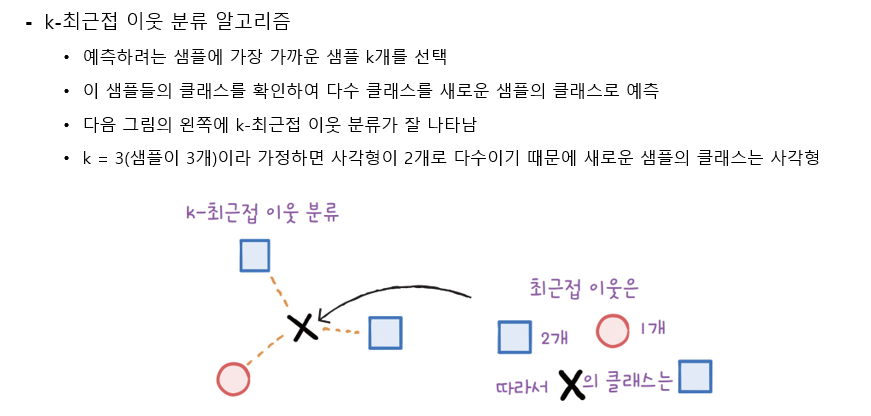

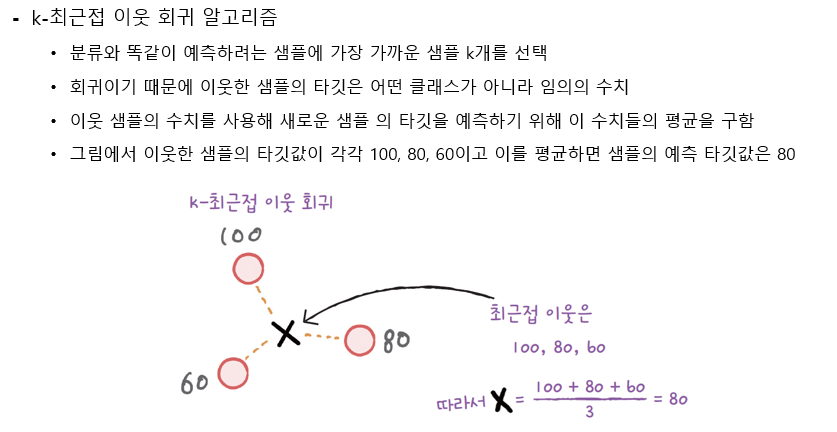

In [1]:
from IPython.display import Image, display
display(Image(filename="img/img22.png", width=600, height=600))
display(Image(filename="img/img23.png", width=600, height=600))

### 데이터 준비

In [2]:
import numpy as np

In [3]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [4]:
import matplotlib.pyplot as plt

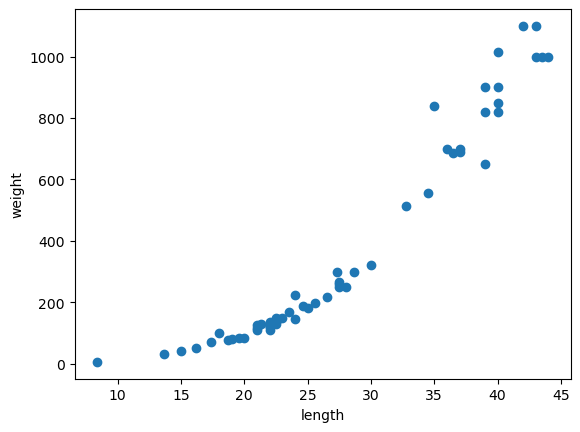

In [5]:
# 값을 구하는 것 이기 때문에 y축에 타켓값을 한다. 특성은 길이 이다.
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# 도미 처리 
# train_input, test_input, train_target, test_target = train_test_split(
#     fish_data, fish_target, stratify=fish_target, random_state=42)

In [8]:
# stratify=fish_target => 사용하지 않음 (균일하게 분류)
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [9]:
print(train_input.shape, test_input.shape)

(42,) (14,)


#### 훈련데이터는 1차원 가능,  입력데이터는 반드시 2차원 배열 (사이키런에서는 )

In [10]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [11]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [12]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [13]:
print(train_input)
print("*" * 50 )
print(test_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
**************************************************
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [14]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 최근접 이웃 회귀 모델을 훈련하기

#### 사이킷런에서 회귀(regression) 문제에서는 정확도(accuracy) 대신 결정계수 R²를 쓰는 이유

1. 출력 값의 특성 차이

분류(classification): 결과가 이산적(예: 개, 고양이, 새 → 0, 1, 2)
→ 정답과 예측이 같으면 1점, 다르면 0점 → "정확도(accuracy)"로 평가 가능

회귀(regression): 결과가 연속적(예: 집값 123.5만 원, 온도 27.3도)
→ 예측이 123.4 vs 123.5 처럼 거의 맞아도, 단순히 "맞았다/틀렸다"로 나눌 수 없음

즉, 정확도라는 개념 자체가 회귀에는 적용 불가능합니다.

2. 오차의 상대적 크기를 반영해야 함
 회귀에서는 예측값이 실제값과 얼마나 가까운지가 중요합니다.

3. R²는 기준 모델과의 상대 성능을 나타냄
R²(결정계수)는 단순히 평균값으로만 예측했을 때(베이스라인 모델)와 비교해서 얼마나 더 나은지를 보여줍니다:
R² = 1: 완벽하게 예측
R² = 0: 평균값만 써도 같은 성능
R² < 0: 평균값보다도 못한 성능


In [15]:
# 사이킷런(sklearn)에서 회귀(regression) 모델의 정확도를 평가할 때는 분류(classification)와 달리 accuracy_score 같은 “정확도(accuracy)” 지표를 사용하지 않습니다. 
# 대신 주로 다음과 같은 회귀 성능 지표를 씁니다:

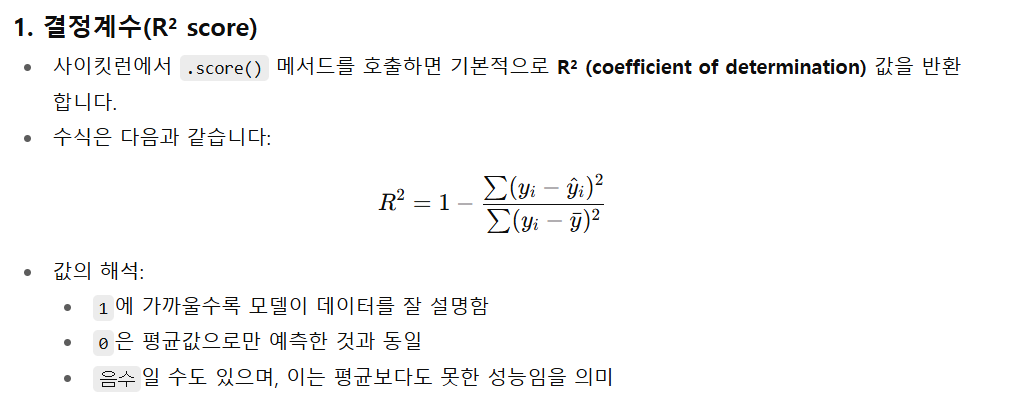

In [16]:
display(Image(filename="img/img24.png", width=600, height=600))

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [19]:
knr.score(test_input, test_target) # 결정계수값 반환한다.

0.992809406101064

MAE (Mean Absolute Error, 평균절대오차) => mean_absolute_error => 직관적으로 “평균적으로 얼마나 틀렸는지” 보여줌
MSE (Mean Squared Error, 평균제곱오차) => (큰 실수를 크게 벌점 줌) 값이 작을수록 좋은 모델
RMSE (Root Mean Squared Error, 평균제곱근오차) => MSE 단위 복원, 해석하기 직관적

In [20]:
from sklearn.metrics import mean_absolute_error 

In [21]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)
# 결과 19.157142857142862
# 예측값이 실제값에서 평균적으로 약 19 단위 정도 차이가 난다는 뜻입니다.
# (즉, 평균적으로 19만큼 틀림)

19.157142857142862


In [22]:
# 훈련세트로 하면 
print(knr.score(train_input, train_target))

0.9698823289099254


훈련세트에 훈련하면 훈련 세트에 잘 맞는 모델이 만들어진다.
이 모델은 훈련 세트와 테스트 세트에서 평가하면 보통 훈련 세트의 
점수가 조금 더 높게 나온다. 
이유는 훈련세트에서 모델을 훈련 했으므로 훈련 세트에서 더 좋은 점수가 나온다.
만약 훈련 세트에서 점수가 광장히 좋았는데 테스트 세트에서 점수가 광장히 나쁘다면 
모델이 훈련 세트에 '과대적합' 되었다고 말한다.
즉 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘풀에 
대한 예측을 만들 때 잘 동작하지 않을 것이다.
반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는
훈련 세트에 과소 적합 되었다고 말한다.
즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우을 말한다.

In [23]:
# from sklearn.metrics import mean_squared_error 

In [24]:
# test_prediction = knr.predict(test_input)
# # 테스트 세트에 대한 평균제곱오차를 계산합니다
# mse = mean_squared_error(test_target, test_prediction)
# print(mse)
# 결과 : 721.7385714285714
# 오차 제곱의 평균. 큰 오차가 있으면 값이 급격히 커집니다 

In [25]:
# rmse = np.sqrt(mse)
# print("RMSE:", rmse) 

# MSE에 루트를 씌운 값으로, 단위를 원래 값 단위로 맞춘 것.
# 예측이 실제값과 평균적으로 약 26.9 단위 정도 차이가 난다는 뜻입니다.

훈련세트보다 테스트 세트의 점수가 높으니 과소적합이다.
해결 방법은 모델을 조금 더 복잡하게 만들자 
훈련 세트에 더 잘 맞게 만들면 테스트 세트의 점수는 조금 낮아 질것이다.
k-최근접 이웃 알고리즘으로 모델을 더 복잡하게 만드는 방법은 이웃의 개수 k를 
줄이는 것이다.
이웃의 개수를 줄이면 훈련세트에 있는 국지적인 패턴에 민감해지고, 
이웃의 개수를 늘리면 데이터 전반에 있는 일반적이 패턴을 따를 것이다.
사이키런의 k 기본 값은 5이므로 3으로 낮추자  

In [26]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [27]:
print(knr.score(test_input, test_target))

0.9746459963987609


테스트 세트의 점수는 내려갔지만 훈련 세트가 있는 데이터를 충분히 잘 학습했음을 알수 있음
두 점수 사이가 둘 다 높으면서 너무 멀지 않게 
그리고 테스트 세트의 점수가 훈련 세트의 점수 보다 좀 낮게 유지 되는 것이 정상적인 모델을 훈련했다고 말할 수 있음

### 거의 두 점수가 차이가 크지 않으므로 성공적으로 회귀 모델 임

#### 과재적합과 과소적합에 대한 처리를 위해서 k 값을 1, 5, 10, 42 으로 바꿔가며 훈련하기

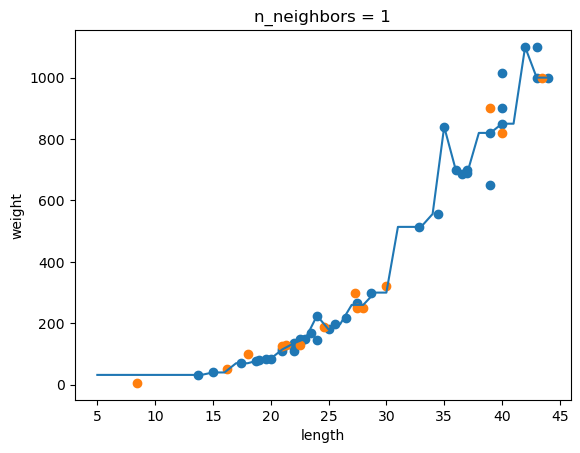

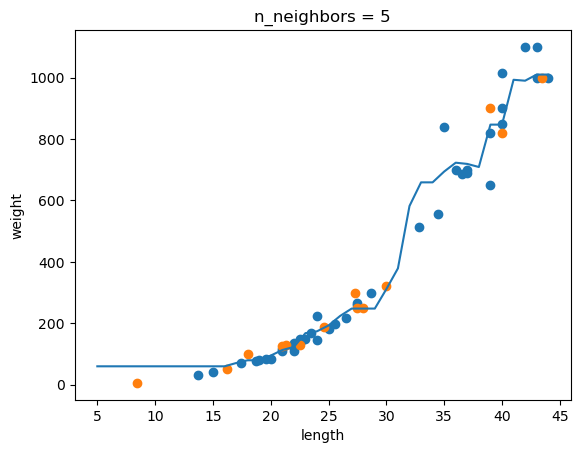

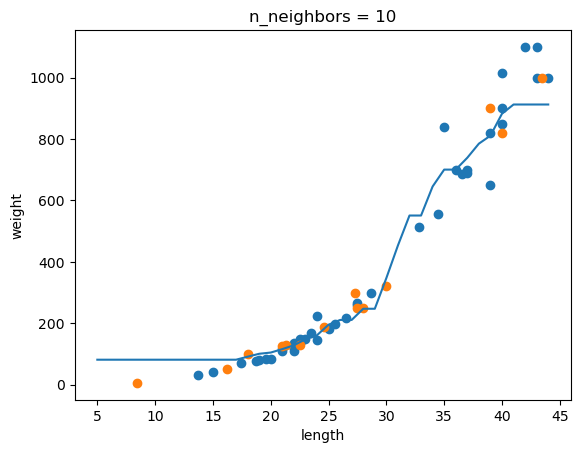

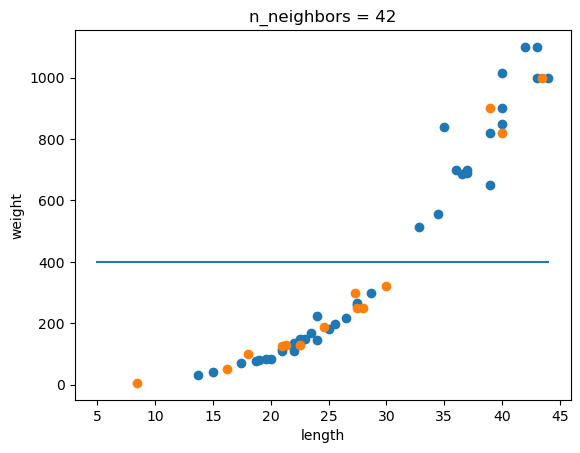

In [28]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
# 1인 경우 주변 샘플을 하나만 보기 때문에 변화가 심하다
# 10인 경우 
for n in [1, 5, 10, 42]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()